<a href="https://colab.research.google.com/github/pereira-71/-EXAMEN-01-PRIMER-PARCIAL/blob/main/labels_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!apt-get update
!apt-get install tesseract-ocr tesseract-ocr-spa
!pip install pytesseract opencv-python pandas pillow

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://cli.github.com/packages stable InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 257 kB in 1s (188 kB/s)
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provid

In [12]:
import pytesseract
print("✅ pytesseract instalado correctamente")

✅ pytesseract instalado correctamente


In [13]:
# Verificar instalación
import cv2
import pytesseract
import pandas as pd
from google.colab import drive

print("✅ Todas las librerías importadas correctamente")

✅ Todas las librerías importadas correctamente


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
🚀 INICIANDO EXTRACTOR MEJORADO
Ruta base: /content/drive/MyDrive/actas_electorales_2025_processed
\n🧪 PROCESANDO IMAGEN DE PRUEBA...
\n🔄 Procesando: acta_CDBL_4.jpg
📍 Mesa: 4, Recinto: Campo_Deportivo_Barrio_Lindo


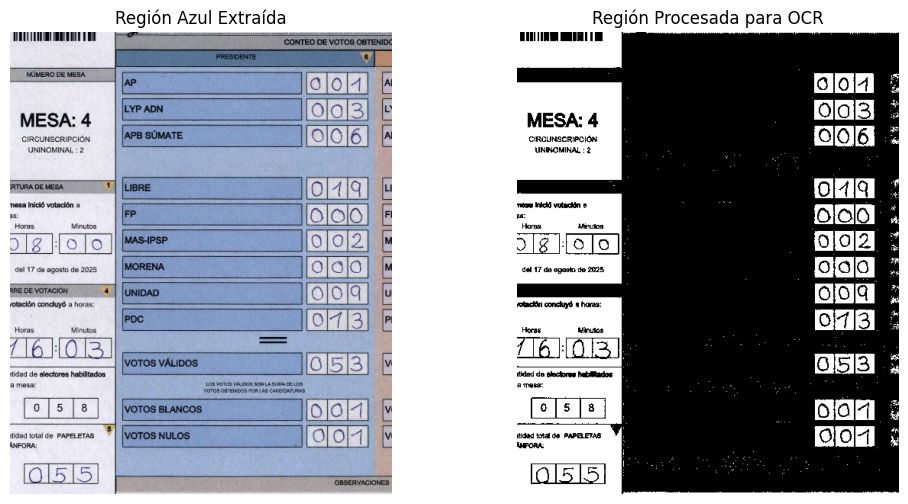

📄 Texto OCR detectado:
1oo4B
El E
MESA4 Que pi
ononecnecn 1oloJ6BA
PA
10110J
viana
e olojo E
171019 0012
sa760opao2ns ojojo
O OO
meo ok
T6J1018
A E
Nag
Y oli
015151

🔍 Analizando líneas:
 0: '1oo4B
El E
MESA4 Que pi
ononecnecn 1oloJ6BA
PA
10110J
viana
e olojo E
171019 0012
sa760opao2ns ojojo
O OO
meo ok
T6J1018
A E
Nag
Y oli
015151'
\n📋 RESULTADO DE PRUEBA:
  imagen: acta_CDBL_4.jpg
  mesa: 4
  recinto: Campo_Deportivo_Barrio_Lindo
  AP: 0
  LYP_ADN: 0
  APB_SUMATE: 0
  LIBRE: 0
  FP: 0
  MAS_IPSP: 0
  MORENA: 0
  UNIDAD: 0
  PDC: 0
  votos_validos: 0
  votos_blancos: 0
  votos_nulos: 0
\n✅ ¿Los datos se ven correctos?
Si sí, ejecuta el procesamiento completo en la siguiente celda


In [16]:
# Instalación mejorada para Colab
!apt-get update -qq
!apt-get install tesseract-ocr tesseract-ocr-spa -qq
!pip install pytesseract opencv-python pandas pillow -qq

import cv2
import numpy as np
import pandas as pd
import pytesseract
from PIL import Image
import os
import re
from google.colab import drive
import matplotlib.pyplot as plt

# Montar Google Drive
drive.mount('/content/drive')

class ActaElectoralExtractorV2:
    def __init__(self):
        pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'

        # Mapeo de recintos
        self.recinto_mapping = {
            'CP': 'Campo_Deportivo_20_de_Octubre',
            'CDBL': 'Campo_Deportivo_Barrio_Lindo',
            'CDNA': 'Campo_Deportivo_Noria_Alta',
            'CDSJ': 'Campo_Deportivo_San_Juanillo_Bajo',
            'CDSA': 'Campo_Deportivo_Zona_America',
            'CDZSF': 'Campo_Deportivo_Zona_San_Francisco',
            'ZRLE': 'Centro_Recreacional_La_Esperanza',
            'CBM': 'Colegio_Bernardo_Monteagudo'
        }

    def extract_mesa_from_filename(self, filename):
        """Extraer número de mesa del nombre del archivo"""
        # Buscar patrón: acta_XXX_N.jpeg donde N es el número de mesa
        match = re.search(r'acta_[A-Z]+_(\d+)\.jpe?g', filename, re.IGNORECASE)
        if match:
            return match.group(1)
        return "NO_DETECTADO"

    def extract_recinto_from_filename(self, filename):
        """Extraer recinto del nombre del archivo"""
        # Buscar patrón: acta_XXX_N.jpeg donde XXX es el código del recinto
        match = re.search(r'acta_([A-Z]+)_\d+\.jpe?g', filename, re.IGNORECASE)
        if match:
            code = match.group(1)
            return self.recinto_mapping.get(code, code)
        return "NO_DETECTADO"

    def preprocess_for_ocr(self, image_path):
        """Preprocesamiento mejorado para OCR"""
        img = cv2.imread(image_path)
        if img is None:
            return None, None

        # Redimensionar si la imagen es muy grande
        height, width = img.shape[:2]
        if width > 1500:
            scale = 1500 / width
            new_width = int(width * scale)
            new_height = int(height * scale)
            img = cv2.resize(img, (new_width, new_height))

        # Convertir a escala de grises
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Mejorar contraste
        clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
        enhanced = clahe.apply(gray)

        # Reducir ruido
        denoised = cv2.medianBlur(enhanced, 3)

        # Binarización adaptativa
        thresh = cv2.adaptiveThreshold(denoised, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                     cv2.THRESH_BINARY, 11, 2)

        return img, thresh

    def detect_blue_section_improved(self, img):
        """Detección mejorada de la sección azul"""
        # Convertir a HSV
        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

        # Rango más amplio para detectar azul
        lower_blue1 = np.array([100, 30, 30])
        upper_blue1 = np.array([130, 255, 255])

        lower_blue2 = np.array([90, 50, 50])
        upper_blue2 = np.array([120, 255, 255])

        # Crear máscaras
        mask1 = cv2.inRange(hsv, lower_blue1, upper_blue1)
        mask2 = cv2.inRange(hsv, lower_blue2, upper_blue2)
        mask = cv2.bitwise_or(mask1, mask2)

        # Limpiar máscara
        kernel = np.ones((3,3), np.uint8)
        mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
        mask = cv2.dilate(mask, kernel, iterations=2)

        return mask

    def extract_votes_improved(self, img, blue_mask):
        """Extracción mejorada de votos"""
        # Encontrar la región azul más grande
        contours, _ = cv2.findContours(blue_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        if not contours:
            print("❌ No se encontraron regiones azules")
            return self.get_empty_votes()

        # Filtrar contornos por área
        large_contours = [c for c in contours if cv2.contourArea(c) > 1000]

        if not large_contours:
            print("❌ No se encontraron regiones azules suficientemente grandes")
            return self.get_empty_votes()

        # Tomar el contorno más grande
        largest_contour = max(large_contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(largest_contour)

        # Expandir región
        margin = 20
        x = max(0, x - margin)
        y = max(0, y - margin)
        w = min(img.shape[1] - x, w + 2*margin)
        h = min(img.shape[0] - y, h + 2*margin)

        # Extraer región
        blue_section = img[y:y+h, x:x+w]

        # Mostrar región extraída para debug
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(blue_section, cv2.COLOR_BGR2RGB))
        plt.title("Región Azul Extraída")
        plt.axis('off')

        # Preprocesar región para OCR
        gray_section = cv2.cvtColor(blue_section, cv2.COLOR_BGR2GRAY)

        # Binarización específica para números
        _, thresh_section = cv2.threshold(gray_section, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        plt.subplot(1, 2, 2)
        plt.imshow(thresh_section, cmap='gray')
        plt.title("Región Procesada para OCR")
        plt.axis('off')
        plt.show()

        # OCR con configuración específica para números
        config = '--psm 6 -c tessedit_char_whitelist=0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz \\n'
        ocr_text = pytesseract.image_to_string(thresh_section, lang='spa', config=config)

        print(f"📄 Texto OCR detectado:")
        print("=" * 50)
        print(ocr_text)
        print("=" * 50)

        # Parsear votos del texto
        votes = self.parse_votes_from_text_improved(ocr_text)

        return votes

    def parse_votes_from_text_improved(self, text):
        """Parser mejorado para extraer votos"""
        lines = [line.strip() for line in text.split('\\n') if line.strip()]

        votes = {
            'AP': 0, 'LYP_ADN': 0, 'APB_SUMATE': 0, 'LIBRE': 0,
            'FP': 0, 'MAS_IPSP': 0, 'MORENA': 0, 'UNIDAD': 0, 'PDC': 0,
            'votos_validos': 0, 'votos_blancos': 0, 'votos_nulos': 0
        }

        print("🔍 Analizando líneas:")
        for i, line in enumerate(lines):
            print(f"{i:2d}: '{line}'")

            line_upper = line.upper()

            # Extraer todos los números de la línea
            numbers = re.findall(r'\\b\\d+\\b', line)

            if numbers:
                last_number = int(numbers[-1])
                print(f"    → Último número encontrado: {last_number}")

                # Identificar partido/categoría
                if 'AP' in line_upper and 'SUMATE' not in line_upper and 'MAS' not in line_upper:
                    votes['AP'] = last_number
                    print(f"    → AP: {last_number}")
                elif 'LYP' in line_upper or 'ADN' in line_upper:
                    votes['LYP_ADN'] = last_number
                    print(f"    → LYP_ADN: {last_number}")
                elif 'SUMATE' in line_upper:
                    votes['APB_SUMATE'] = last_number
                    print(f"    → APB_SUMATE: {last_number}")
                elif 'LIBRE' in line_upper:
                    votes['LIBRE'] = last_number
                    print(f"    → LIBRE: {last_number}")
                elif 'FP' in line_upper and 'MAS' not in line_upper:
                    votes['FP'] = last_number
                    print(f"    → FP: {last_number}")
                elif 'MAS' in line_upper or 'IPSP' in line_upper:
                    votes['MAS_IPSP'] = last_number
                    print(f"    → MAS_IPSP: {last_number}")
                elif 'MORENA' in line_upper:
                    votes['MORENA'] = last_number
                    print(f"    → MORENA: {last_number}")
                elif 'UNIDAD' in line_upper:
                    votes['UNIDAD'] = last_number
                    print(f"    → UNIDAD: {last_number}")
                elif 'PDC' in line_upper:
                    votes['PDC'] = last_number
                    print(f"    → PDC: {last_number}")
                elif 'VALIDOS' in line_upper:
                    votes['votos_validos'] = last_number
                    print(f"    → VOTOS_VALIDOS: {last_number}")
                elif 'BLANCOS' in line_upper:
                    votes['votos_blancos'] = last_number
                    print(f"    → VOTOS_BLANCOS: {last_number}")
                elif 'NULOS' in line_upper:
                    votes['votos_nulos'] = last_number
                    print(f"    → VOTOS_NULOS: {last_number}")

        return votes

    def get_empty_votes(self):
        """Retornar estructura vacía de votos"""
        return {
            'AP': 0, 'LYP_ADN': 0, 'APB_SUMATE': 0, 'LIBRE': 0,
            'FP': 0, 'MAS_IPSP': 0, 'MORENA': 0, 'UNIDAD': 0, 'PDC': 0,
            'votos_validos': 0, 'votos_blancos': 0, 'votos_nulos': 0
        }

    def process_single_acta(self, image_path):
        """Procesar una acta individual"""
        filename = os.path.basename(image_path)
        print(f"\\n🔄 Procesando: {filename}")

        # Extraer datos del nombre del archivo
        mesa_number = self.extract_mesa_from_filename(filename)
        recinto = self.extract_recinto_from_filename(filename)

        print(f"📍 Mesa: {mesa_number}, Recinto: {recinto}")

        # Preprocesar imagen
        img, thresh = self.preprocess_for_ocr(image_path)
        if img is None:
            print("❌ Error cargando imagen")
            return None

        # Detectar sección azul
        blue_mask = self.detect_blue_section_improved(img)

        # Extraer votos
        votes = self.extract_votes_improved(img, blue_mask)

        # Crear resultado
        result = {
            'imagen': filename,
            'mesa': mesa_number,
            'recinto': recinto,
            **votes
        }

        return result

# CONFIGURACIÓN Y EJECUCIÓN
BASE_PATH = '/content/drive/MyDrive/actas_electorales_2025_processed'

print("🚀 INICIANDO EXTRACTOR MEJORADO")
print(f"Ruta base: {BASE_PATH}")

# Verificar ruta
if not os.path.exists(BASE_PATH):
    print(f"❌ Ruta no encontrada: {BASE_PATH}")
    print("Por favor ajusta BASE_PATH con la ruta correcta")
else:
    extractor = ActaElectoralExtractorV2()

    # Procesar una imagen de prueba primero
    print("\\n🧪 PROCESANDO IMAGEN DE PRUEBA...")

    # Buscar la primera imagen disponible
    test_image = None
    for folder in os.listdir(BASE_PATH):
        folder_path = os.path.join(BASE_PATH, folder)
        if os.path.isdir(folder_path):
            for file in os.listdir(folder_path):
                if file.lower().endswith(('.jpg', '.jpeg')):
                    test_image = os.path.join(folder_path, file)
                    break
            if test_image:
                break

    if test_image:
        result = extractor.process_single_acta(test_image)
        if result:
            print("\\n📋 RESULTADO DE PRUEBA:")
            for key, value in result.items():
                print(f"  {key}: {value}")

            print("\\n✅ ¿Los datos se ven correctos?")
            print("Si sí, ejecuta el procesamiento completo en la siguiente celda")
        else:
            print("❌ Error en procesamiento de prueba")
    else:
        print("❌ No se encontró ninguna imagen de prueba")

In [17]:
# PROCESAMIENTO COMPLETO DE TODAS LAS ACTAS
import time
from datetime import datetime

def process_all_actas_complete():
    """Procesar todas las actas del dataset"""

    # Estructura completa del dataset
    folders_info = {
        'Campo_Deportivo_20_de_Octubre': {'prefix': 'CP', 'expected': 7},
        'Campo_Deportivo_Barrio_Lindo': {'prefix': 'CDBL', 'expected': 4},
        'Campo_Deportivo_Noria_Alta': {'prefix': 'CDNA', 'expected': 7},
        'Campo_Deportivo_San_Juanillo_Bajo': {'prefix': 'CDSJ', 'expected': 9},
        'Campo_Deportivo_Zona_America': {'prefix': 'CDSA', 'expected': 8},
        'Campo_Deportivo_Zona_San_Francisco': {'prefix': 'CDZSF', 'expected': 7},
        'Centro_Recreacional_La_Esperanza': {'prefix': 'ZRLE', 'expected': 4},
        'Colegio_Bernardo_Monteagudo': {'prefix': 'CBM', 'expected': 6}
    }

    all_results = []
    total_processed = 0
    total_errors = 0

    print("🚀 INICIANDO PROCESAMIENTO COMPLETO DE TODAS LAS ACTAS")
    print("=" * 60)

    start_time = time.time()

    # Procesar cada carpeta
    for folder_name, info in folders_info.items():
        folder_path = os.path.join(BASE_PATH, folder_name)

        print(f"\n📂 PROCESANDO: {folder_name}")
        print(f"   Esperadas: {info['expected']} actas")

        if not os.path.exists(folder_path):
            print(f"   ❌ Carpeta no encontrada: {folder_path}")
            continue

        folder_results = []
        folder_errors = 0

        # Buscar archivos en la carpeta
        files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg'))]
        files.sort()  # Ordenar archivos

        print(f"   📁 Archivos encontrados: {len(files)}")

        for filename in files:
            image_path = os.path.join(folder_path, filename)

            try:
                print(f"   🔄 {filename}...", end=" ")

                # Procesar acta (sin mostrar visualizaciones)
                result = process_acta_silent(image_path)

                if result:
                    folder_results.append(result)
                    total_processed += 1

                    # Mostrar resumen rápido
                    mesa = result.get('mesa', 'N/A')
                    mas_votos = result.get('MAS_IPSP', 0)
                    validos = result.get('votos_validos', 0)
                    print(f"✅ Mesa:{mesa} MAS:{mas_votos} Válidos:{validos}")

                else:
                    folder_errors += 1
                    total_errors += 1
                    print("❌ Error en procesamiento")

            except Exception as e:
                folder_errors += 1
                total_errors += 1
                print(f"❌ Error: {str(e)[:50]}...")

        # Resumen de la carpeta
        print(f"   📊 Carpeta completada: {len(folder_results)}/{len(files)} exitosas")
        if folder_errors > 0:
            print(f"   ⚠️  Errores en carpeta: {folder_errors}")

        all_results.extend(folder_results)

    # RESUMEN FINAL
    end_time = time.time()
    processing_time = end_time - start_time

    print("\n" + "=" * 60)
    print("🎉 PROCESAMIENTO COMPLETADO")
    print("=" * 60)
    print(f"⏱️  Tiempo total: {processing_time/60:.1f} minutos")
    print(f"✅ Actas procesadas exitosamente: {total_processed}")
    print(f"❌ Errores: {total_errors}")
    print(f"📊 Tasa de éxito: {(total_processed/(total_processed+total_errors)*100):.1f}%")

    if all_results:
        # Crear DataFrame
        df_results = pd.DataFrame(all_results)

        # Generar timestamp para el archivo
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        csv_filename = f'actas_procesadas_{timestamp}.csv'

        # Guardar en Drive
        drive_path = f'/content/drive/MyDrive/{csv_filename}'
        df_results.to_csv(drive_path, index=False, encoding='utf-8')

        # También guardar local
        df_results.to_csv(csv_filename, index=False, encoding='utf-8')

        print(f"💾 Archivo guardado: {csv_filename}")
        print(f"📁 Ubicación Drive: Mi unidad/{csv_filename}")

        # ESTADÍSTICAS DETALLADAS
        print("\n📈 ESTADÍSTICAS DETALLADAS:")
        print(f"   Total actas en dataset: {len(df_results)}")
        print(f"   Mesas detectadas correctamente: {len([r for r in all_results if r['mesa'] != 'NO_DETECTADO'])}")

        # Estadísticas por recinto
        print("\n🏢 POR RECINTO:")
        recintos_count = df_results['recinto'].value_counts()
        for recinto, count in recintos_count.items():
            print(f"   {recinto}: {count} actas")

        # Estadísticas de votos
        print("\n🗳️  ESTADÍSTICAS DE VOTOS:")
        total_mas = df_results['MAS_IPSP'].sum()
        total_validos = df_results['votos_validos'].sum()
        total_blancos = df_results['votos_blancos'].sum()
        total_nulos = df_results['votos_nulos'].sum()

        print(f"   Total votos MAS-IPSP: {total_mas:,}")
        print(f"   Total votos válidos: {total_validos:,}")
        print(f"   Total votos blancos: {total_blancos:,}")
        print(f"   Total votos nulos: {total_nulos:,}")

        if total_validos > 0:
            porcentaje_mas = (total_mas / total_validos) * 100
            print(f"   % MAS-IPSP del total válidos: {porcentaje_mas:.1f}%")

        # Mostrar muestra de resultados
        print("\n📋 MUESTRA DE RESULTADOS (primeras 10 actas):")
        print(df_results[['imagen', 'mesa', 'MAS_IPSP', 'votos_validos', 'votos_blancos', 'votos_nulos']].head(10).to_string(index=False))

        # Detectar posibles problemas
        print("\n🔍 DETECCIÓN DE PROBLEMAS:")
        problemas = []

        # Actas con todos los votos en 0
        actas_sin_votos = df_results[(df_results[['AP', 'LYP_ADN', 'APB_SUMATE', 'LIBRE', 'FP', 'MAS_IPSP', 'MORENA', 'UNIDAD', 'PDC']].sum(axis=1)) == 0]
        if len(actas_sin_votos) > 0:
            problemas.append(f"⚠️  {len(actas_sin_votos)} actas sin votos detectados")

        # Mesas no detectadas
        mesas_no_detectadas = len([r for r in all_results if r['mesa'] == 'NO_DETECTADO'])
        if mesas_no_detectadas > 0:
            problemas.append(f"⚠️  {mesas_no_detectadas} mesas no detectadas")

        # Mostrar problemas
        if problemas:
            for problema in problemas:
                print(f"   {problema}")
        else:
            print("   ✅ No se detectaron problemas mayores")

        return df_results

    else:
        print("❌ No se procesaron actas exitosamente")
        return None

def process_acta_silent(image_path):
    """Procesar acta sin mostrar visualizaciones (para procesamiento masivo)"""
    filename = os.path.basename(image_path)

    # Extraer datos del nombre del archivo
    mesa_number = extractor.extract_mesa_from_filename(filename)
    recinto = extractor.extract_recinto_from_filename(filename)

    # Preprocesar imagen
    img, thresh = extractor.preprocess_for_ocr(image_path)
    if img is None:
        return None

    # Detectar sección azul
    blue_mask = extractor.detect_blue_section_improved(img)

    # Extraer votos (sin visualizaciones)
    votes = extract_votes_silent(img, blue_mask)

    # Crear resultado
    result = {
        'imagen': filename,
        'mesa': mesa_number,
        'recinto': recinto,
        **votes
    }

    return result

def extract_votes_silent(img, blue_mask):
    """Extraer votos sin mostrar visualizaciones"""
    # Encontrar la región azul más grande
    contours, _ = cv2.findContours(blue_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if not contours:
        return extractor.get_empty_votes()

    # Filtrar contornos por área
    large_contours = [c for c in contours if cv2.contourArea(c) > 1000]

    if not large_contours:
        return extractor.get_empty_votes()

    # Tomar el contorno más grande
    largest_contour = max(large_contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(largest_contour)

    # Expandir región
    margin = 20
    x = max(0, x - margin)
    y = max(0, y - margin)
    w = min(img.shape[1] - x, w + 2*margin)
    h = min(img.shape[0] - y, h + 2*margin)

    # Extraer región
    blue_section = img[y:y+h, x:x+w]

    # Preprocesar región para OCR
    gray_section = cv2.cvtColor(blue_section, cv2.COLOR_BGR2GRAY)
    _, thresh_section = cv2.threshold(gray_section, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # OCR
    config = '--psm 6 -c tessedit_char_whitelist=0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz \\n'
    ocr_text = pytesseract.image_to_string(thresh_section, lang='spa', config=config)

    # Parsear votos
    votes = extractor.parse_votes_from_text_improved(ocr_text)

    return votes

# EJECUTAR PROCESAMIENTO COMPLETO
print("🎯 LISTO PARA PROCESAR TODAS LAS ACTAS")
print("Este proceso puede tomar 10-15 minutos")
print("¿Continuar? (Se ejecutará automáticamente)")

# Ejecutar
df_final = process_all_actas_complete()

if df_final is not None:
    print("\\n🎊 ¡PROCESAMIENTO EXITOSO!")
    print("Ahora puedes descargar el archivo CSV desde tu Drive")
    print("\\nSiguientes pasos:")
    print("1. ✅ Revisar el archivo CSV generado")
    print("2. ✅ Crear la base de datos")
    print("3. ✅ Implementar el modelo de validación")
else:
    print("❌ Hubo problemas en el procesamiento")
    print("Revisa los mensajes de error anteriores")

🎯 LISTO PARA PROCESAR TODAS LAS ACTAS
Este proceso puede tomar 10-15 minutos
¿Continuar? (Se ejecutará automáticamente)
🚀 INICIANDO PROCESAMIENTO COMPLETO DE TODAS LAS ACTAS

📂 PROCESANDO: Campo_Deportivo_20_de_Octubre
   Esperadas: 7 actas
   📁 Archivos encontrados: 7
   🔄 acta_CDP_1.jpg... 🔍 Analizando líneas:
 0: 'o ada Copia1OperadordeTeansmisinCopia2NotariaNotarioCopia3PresidentalPresinentejeMesaCopia4a12Delegadas A
PARALLENARLASCASILASDEPESULTADOSSE VESDEmaLEJANDOAL ia di
A A
E td
PRESTO Pa
oelsserol
E E
MESA1 ci ole A
MESA OSADAAs
mas o LoLoJE
a
GE
areacivoacn o sE
AN doloJ
OT dolo
a ETT
riab E
EAS
JOE riata5768QY
e
z rec E a i
B E ES EYUN le ph
o
En lr
e a E
peOPEETTTTTO
rd AMECEE Amma A o
O Earos
IAEA
e l
7YaRRAECANGRAAATNIAAAOsZ0IROUTESGPARJONATONAQICARIATIDRCARTAIICAEUMTINADAA'
✅ Mesa:1 MAS:0 Válidos:0
   🔄 acta_CDP_2.jpg... 🔍 Analizando líneas:
 0: '1007291 a
a
E
NU nn
DER
El
MESA2 ok
ncscuecin 1o41BBa
TS
ols1BE
comia E
a Lolo
e19e12 0n
cars oloIoBE
5k
hn LoJ83e
112114101 i